## Homework Week 2

In [32]:
car_fuel_efficiency = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

!wget $car_fuel_efficiency

--2025-10-08 18:54:25--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.3’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.01s   

2025-10-08 18:54:25 (74.5 MB/s) - ‘car_fuel_efficiency.csv.3’ saved [874188/874188]



In [33]:
import pandas as pd
import numpy as np

In [34]:
df = pd.read_csv("car_fuel_efficiency.csv")
df.head(5)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [35]:
list(df.columns)

['engine_displacement',
 'num_cylinders',
 'horsepower',
 'vehicle_weight',
 'acceleration',
 'model_year',
 'origin',
 'fuel_type',
 'drivetrain',
 'num_doors',
 'fuel_efficiency_mpg']

In [36]:
df = df.copy()
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [37]:
import seaborn as sns

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

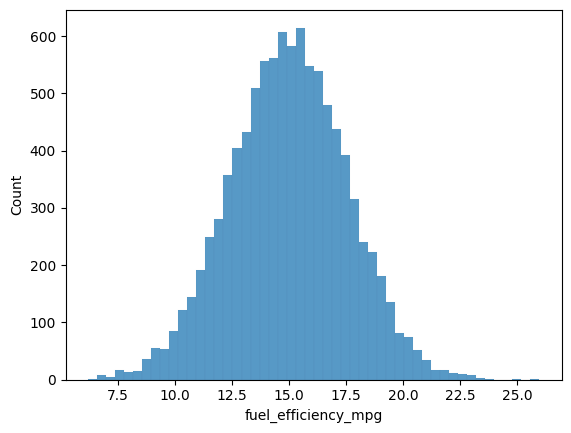

In [38]:
sns.histplot(df.fuel_efficiency_mpg, bins=50, linewidth=0.01) #no --> don't need to take log

### Q1

In [39]:
df.isnull().sum()
#horsepower

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Q2

In [40]:
df.horsepower.describe()

#149.000000

count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

In [41]:
n = len(df)

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [42]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [43]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test =  df.iloc[idx[n_train+n_val:]]

In [44]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [45]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209


In [46]:
y_train = df_train.fuel_efficiency_mpg
y_test = df_test.fuel_efficiency_mpg
y_val = df_val.fuel_efficiency_mpg
len(y_train)

5824

In [47]:
del df_train['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']

### Q3

In [48]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [49]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

Filling nan with 0:

In [50]:
def prepare_X_zero(df):
    df = df.copy()
    df.horsepower = df.horsepower.fillna(0)

    X = df.values

    return X

In [51]:
X_train = prepare_X_zero(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X_zero(df_val)
y_pred = w0 + X_val.dot(w)

print("RMSE with fill 0: ", round(rmse(y_val, y_pred), 2))

RMSE with fill 0:  0.52


Filling nan with mean:

In [52]:
def prepare_X_mean(df):
    df = df.copy()
    df.horsepower = df.horsepower.fillna(df.horsepower.mean())

    X = df.values

    return X

In [53]:
X_train = prepare_X_mean(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X_mean(df_val)
y_pred = w0 + X_val.dot(w)

print("RMSE with fill mean: ", round(rmse(y_val, y_pred), 2))

RMSE with fill mean:  0.46


Filling nan values with mean gives a better RMSE

### Q4

In [54]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])


    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [55]:
results = []

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X_zero(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r)

    X_val = prepare_X_zero(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)

    results.append({'r': r, 'score': score})

    print("r: ", r, "RMSE: ", score)


r:  0 RMSE:  0.5173782638857467
r:  0.01 RMSE:  0.5171115525767522
r:  0.1 RMSE:  0.5187525130701821
r:  1 RMSE:  0.5222348802092772
r:  5 RMSE:  0.5228916092823478
r:  10 RMSE:  0.5229812979636581
r:  100 RMSE:  0.5230636233819926


In [56]:
min(results, key=lambda x: x["score"])


{'r': 0.01, 'score': np.float64(0.5171115525767522)}

### Q5

In [82]:
def data_split(seed, df=df, n_val=n_val, n_test=n_test, n_train=n_train):
    df = df.copy()
    n = len(df)
    idx = np.arange(n)
    
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = (df.iloc[idx[:n_train]]).reset_index(drop=True)
    df_val = (df.iloc[idx[n_train:n_train+n_val]]).reset_index(drop=True)
    df_test =  (df.iloc[idx[n_train+n_val:]]).reset_index(drop=True)

    y_train = df_train.fuel_efficiency_mpg
    y_val = df_val.fuel_efficiency_mpg
    y_test = df_test.fuel_efficiency_mpg

    del df_train['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']

    return df_train, df_val, df_test, y_train, y_val, y_test

In [ ]:
scores = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train, df_val, df_test, y_train, y_val, y_test = data_split(seed)

    X_train = prepare_X_zero(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X_zero(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    scores.append(score)


In [87]:
round(np.std(scores), 3)

np.float64(0.007)

### Q6

In [92]:
df_train, df_val, df_test, y_train, y_val, y_test = data_split(9)

df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)
y_full_train = np.concatenate([y_train, y_val])

X_full_train = prepare_X_zero(df_full_train)

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [95]:
X_test = prepare_X_zero(df_test)

y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)
print("RMSE: ", np.round(score, 3))


RMSE:  0.516
